In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import torch

In [2]:
monochromatic=pd.read_excel('Глубинные распределения.Вода.xlsx',header=1,skiprows=[0,1,1004,1005,1006],names=['N']+[str((a+10)) for a in range(241)])

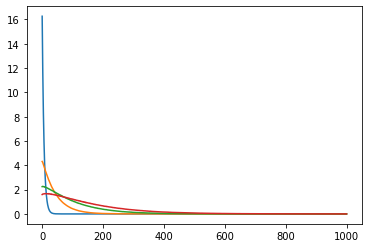

In [3]:
plt.plot(monochromatic[[str(i*10) for i in range(1,5)]])

In [4]:
monochromatic[monochromatic.columns[1:]]

,10,11,12,13,14,15,16,17,18,19,...,241,242,243,244,245,246,247,248,249,250
0,16.26050,13.68690,11.60130,9.94423,8.59829,7.51065,6.64036,5.89479,5.27978,4.77786,...,3.445410,3.457320,3.497280,3.491070,3.492450,3.492690,3.507650,3.544040,3.531340,3.518790
1,13.78610,12.06270,10.56940,9.25902,8.14649,7.21545,6.40867,5.74134,5.16759,4.69685,...,3.862080,3.863850,3.903620,3.907590,3.954290,3.961370,3.972640,3.978430,4.000780,3.998650
2,11.66950,10.64600,9.58269,8.58107,7.66815,6.84943,6.14983,5.54553,5.03787,4.59736,...,3.871370,3.910790,3.933340,3.913040,3.919740,3.956680,3.985730,3.994810,4.023560,4.014650
3,9.82371,9.37569,8.69378,7.95280,7.22247,6.56665,5.92183,5.39470,4.91986,4.50224,...,3.883210,3.911650,3.919030,3.948250,3.973650,4.000310,4.031220,4.005090,4.040010,4.041560
4,8.28183,8.25591,7.88871,7.36056,6.79086,6.22568,5.69637,5.21822,4.79430,4.40034,...,3.906810,3.906360,3.964990,3.960170,3.991600,3.976410,4.006100,4.037680,4.060860,4.053420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.143023,0.141208,0.145672,0.154861,0.143717,0.150664,0.150353,0.148956,0.157569,0.150270
996,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.141504,0.142619,0.144873,0.150402,0.149478,0.149542,0.146506,0.149710,0.157829,0.159218
997,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.137268,0.140997,0.143103,0.141869,0.147796,0.142653,0.148264,0.149687,0.147404,0.155149
998,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.136846,0.138657,0.142212,0.138421,0.143003,0.148539,0.148493,0.141899,0.145956,0.149409


In [5]:
path='spectra_current/'
dosedistrs={}
specs={}
for dosefile in [f for f in os.listdir(path) if f.startswith('eDep')]:
    try:
        dosedistrs[int(float(dosefile.split('box')[-1][:-4]))]=pd.read_csv(path+dosefile, header=2,names=['x','y','z','E','a','b']) 
    except:
        None
for specfile in [f for f in os.listdir(path) if f.startswith('spectra') and f!='spectra.txt']:
    specs[int(float(specfile.split('spectra')[-1][:-4]))]=pd.read_csv(path+specfile,names=['energy','I'],sep=' ')

In [6]:
specs.keys()

dict_keys([1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 5, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 6, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 7, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 8, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 9, 90, 91, 92, 93])

In [7]:
path='spectra_current2/'
dosedistrs={}
specs={}
for dosefile in [f for f in os.listdir(path) if f.startswith('eDep')]:
    try:
        dosedistrs[int(float(dosefile.split('box')[-1][2:-4])*100)]=pd.read_csv(path+dosefile, header=2,names=['x','y','z','E','a','b']) 
    except:
        None
for specfile in [f for f in os.listdir(path) if f.startswith('spectra') and f!='spectra.txt']:
    specs[int(float(specfile.split('spectra')[-1][2:-4])*100)]=pd.read_csv(path+specfile,names=['energy','I'],sep=' ')

In [8]:
dosefile.split('box')[-1][:-4]

'_L2.16'

In [9]:
dosedistrs.keys()

dict_keys([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 57, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 113, 115, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216])

In [10]:
specs.keys()

dict_keys([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 57, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 113, 115, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216])

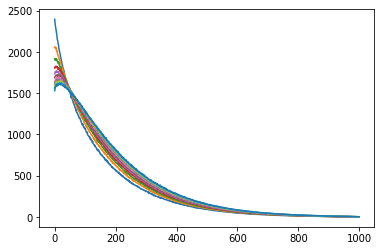

In [11]:
for i in range(1,12):
    plt.plot(dosedistrs[i*6]['E'])

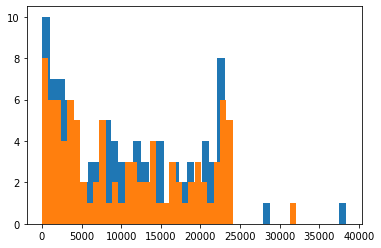

In [12]:
for i in range(1,3):
    plt.hist(specs[i*2]['I'],bins=40)

In [13]:
specs[2]['energy']

0       6.0
1       7.0
2       8.0
3       9.0
4      10.0
      ...  
90     96.0
91     97.0
92     98.0
93     99.0
94    100.0
Name: energy, Length: 95, dtype: float64

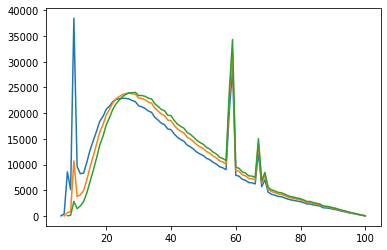

In [14]:
for i in range(1,4):
    plt.plot(specs[i*2]['energy'],specs[i*2]['I'])

In [15]:
Ans=np.zeros(1000)
for energy in range(1,1000):
    try:
        Ans=Ans+specs[8][specs[8]['energy']==energy].iloc[0]['I']*monochromatic[str(energy)]
    except:
        None

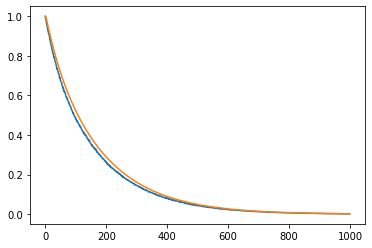

In [16]:
#plt.plot(Ans/Ans.max())
for i in [8]:
    plt.plot(dosedistrs[i]['E']/dosedistrs[i]['E'].max())
    plt.plot(Ans/Ans.max())

In [17]:
class Dosedistr(torch.nn.Module):
    def __init__(self, num_filters=8, channels_in=1, channels_out=241):
        super().__init__()
        self.spectrum=torch.nn.Conv1d(241, 1, 1,bias=False)
    def forward(self, basis):
        outs=self.spectrum(basis)
        return outs

In [18]:
def trainstep(model,inp,target, optimizer,lossfn=torch.nn.MSELoss()):
    optimizer.zero_grad()
    out=model(inp)
    l2_reg=0
    #model.spectrum.weight.data[:,:,:]=model.spectrum.weight.data[:,:,:]/model.spectrum.weight.data[:,:,:].sum(1,keepdim=True)
    #for param in model.parameters():
    l1_reg = model.spectrum.weight[:,:56-6,:].square().mean()/2+model.spectrum.weight[:,58-6:,:].square().mean()/2
    gradx=(model.spectrum.weight[:,1:-1,:]-model.spectrum.weight.roll(1,-2)[:,1:-1,:])*1000
    l2_smooth = gradx.square().mean()
    secgradx=gradx[:,1:-1,:]-gradx.roll(1,-2)[:,1:-1,:]
    l3_smooth=secgradx.square().mean()
    loss=lossfn(out, target)*10000+l2_smooth#+l1_reg*100+l2_smooth/10
    loss.backward()
    optimizer.step()
    #model.spectrum.weight.data[:,100:,:]=0
    for p in model.parameters():
        p.data.clamp_(0)
    #model.spectrum.weight.data[:,:3,:]=0
    return loss

In [191]:
model.spectrum.weight.shape

torch.Size([1, 241, 1])

In [259]:
number=10
inps=torch.tensor(np.array(monochromatic[monochromatic.columns[1:]])).T.unsqueeze(0).to(torch.float32)
target=torch.tensor(dosedistrs[number]['E']/dosedistrs[2]['E'].max()).unsqueeze(0).unsqueeze(0).to(torch.float32)

In [260]:
#dose=Dosedistr()
modelRMS=Dosedistr()
modelRMS.train()
modelSGD=Dosedistr()
modelSGD.train()
modelADAM=Dosedistr()
modelADAM.train()
optimizerADAM=torch.optim.Adam(modelADAM.parameters(), lr=0.0001)
optimizerSGD=torch.optim.SGD(modelSGD.parameters(), lr=0.0001)
optimizerRMS=torch.optim.RMSprop(modelRMS.parameters(), lr=0.0001)
lossesRMS=[]
lossesADAM=[]
lossesSGD=[]
for optimizer,model,losses in zip([optimizerSGD,optimizerRMS,optimizerADAM],
                                 [modelSGD,modelRMS,modelADAM],
                                 [lossesSGD,lossesRMS,lossesADAM]):
    for i in range(30900):
        if i%100==51:
            losses.append(loss.detach().cpu().numpy())
        loss=trainstep(model, inps,target,optimizer)
        if i%1000==0:
            print(loss,model.spectrum.weight[0][0])

tensor(9908.8682, grad_fn=<AddBackward0>) tensor([0.3685], grad_fn=<SelectBackward0>)
tensor(296.9841, grad_fn=<AddBackward0>) tensor([0.1246], grad_fn=<SelectBackward0>)
tensor(296.9841, grad_fn=<AddBackward0>) tensor([0.1246], grad_fn=<SelectBackward0>)
tensor(296.9841, grad_fn=<AddBackward0>) tensor([0.1246], grad_fn=<SelectBackward0>)
tensor(296.9841, grad_fn=<AddBackward0>) tensor([0.1246], grad_fn=<SelectBackward0>)
tensor(296.9841, grad_fn=<AddBackward0>) tensor([0.1246], grad_fn=<SelectBackward0>)
tensor(296.9841, grad_fn=<AddBackward0>) tensor([0.1246], grad_fn=<SelectBackward0>)
tensor(296.9841, grad_fn=<AddBackward0>) tensor([0.1246], grad_fn=<SelectBackward0>)
tensor(296.9841, grad_fn=<AddBackward0>) tensor([0.1246], grad_fn=<SelectBackward0>)
tensor(296.9841, grad_fn=<AddBackward0>) tensor([0.1246], grad_fn=<SelectBackward0>)
tensor(296.9841, grad_fn=<AddBackward0>) tensor([0.1246], grad_fn=<SelectBackward0>)
tensor(296.9841, grad_fn=<AddBackward0>) tensor([0.1246], grad_f

KeyboardInterrupt: 

In [25]:
inps=torch.tensor(np.array(monochromatic[monochromatic.columns[1:]])).T.unsqueeze(0).to(torch.float32)
outs={}
for number in dosedistrs.keys():
    #number=10
    target=torch.tensor(dosedistrs[number]['E']/dosedistrs[number]['E'].max()).unsqueeze(0).unsqueeze(0).to(torch.float32)
    lossesADAM=[]
    modelADAM=Dosedistr().cpu()
    modelADAM.train()
    optimizerADAM=torch.optim.Adam(modelADAM.parameters(), lr=0.0001)
    for i in range(20900):
        if i%100==51:
            continue
            #lossesADAM.append(loss.detach().cpu().numpy())
        loss=trainstep(modelADAM, inps.cpu(),target.cpu(),optimizerADAM)
        if i%10000==0:
            print(loss,modelADAM.spectrum.weight[0][0])
        if i<5000 and i%1000==1:
            modelADAM.spectrum.weight.data=modelADAM.spectrum.weight.data+torch.rand(modelADAM.spectrum.weight.data.shape)*0.01
    print (number)
    outs[number]=modelADAM.spectrum.weight.cpu().detach().numpy()[0,:,0]
    #if number==10:
    #    break

tensor(7046.4980, grad_fn=<AddBackward0>) tensor([0.0075], grad_fn=<SelectBackward0>)
tensor(0.9248, grad_fn=<AddBackward0>) tensor([0.0166], grad_fn=<SelectBackward0>)
tensor(0.9195, grad_fn=<AddBackward0>) tensor([0.0165], grad_fn=<SelectBackward0>)
0
tensor(17992.3516, grad_fn=<AddBackward0>) tensor([0.0402], grad_fn=<SelectBackward0>)
tensor(0.0813, grad_fn=<AddBackward0>) tensor([0.0076], grad_fn=<SelectBackward0>)
tensor(0.0790, grad_fn=<AddBackward0>) tensor([0.0076], grad_fn=<SelectBackward0>)
2
tensor(9890.4316, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
tensor(0.0662, grad_fn=<AddBackward0>) tensor([0.0030], grad_fn=<SelectBackward0>)
tensor(0.0392, grad_fn=<AddBackward0>) tensor([0.0026], grad_fn=<SelectBackward0>)
4
tensor(4930.1758, grad_fn=<AddBackward0>) tensor([0.0298], grad_fn=<SelectBackward0>)
tensor(0.0724, grad_fn=<AddBackward0>) tensor([0.0011], grad_fn=<SelectBackward0>)
tensor(0.0577, grad_fn=<AddBackward0>) tensor([0.0008], grad_fn=<SelectB

64
tensor(5033.2803, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
tensor(0.3010, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
tensor(0.1173, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
66
tensor(9724.0469, grad_fn=<AddBackward0>) tensor([0.0015], grad_fn=<SelectBackward0>)
tensor(0.1826, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
tensor(0.1165, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
68
tensor(3307.4922, grad_fn=<AddBackward0>) tensor([0.0149], grad_fn=<SelectBackward0>)
tensor(0.2231, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
tensor(0.1186, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
70
tensor(3059.8635, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
tensor(0.2713, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
tensor(0.1165, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
72
tensor(56884.1016

tensor(0.4187, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
tensor(0.1413, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
132
tensor(3128.5044, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
tensor(0.4359, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
tensor(0.1493, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
134
tensor(7062.1729, grad_fn=<AddBackward0>) tensor([0.0170], grad_fn=<SelectBackward0>)
tensor(0.3504, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
tensor(0.1442, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
136
tensor(15227.1699, grad_fn=<AddBackward0>) tensor([0.0547], grad_fn=<SelectBackward0>)
tensor(0.3610, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
tensor(0.1365, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
138
tensor(14565.9648, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
tensor(0.4080,

tensor(0.1593, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
198
tensor(6549.6357, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
tensor(0.4646, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
tensor(0.1593, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
200
tensor(9756.8018, grad_fn=<AddBackward0>) tensor([0.0235], grad_fn=<SelectBackward0>)
tensor(0.4467, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
tensor(0.1546, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
202
tensor(3494.1858, grad_fn=<AddBackward0>) tensor([0.0637], grad_fn=<SelectBackward0>)
tensor(0.4849, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
tensor(0.1572, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
204
tensor(5054.0166, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
tensor(0.5045, grad_fn=<AddBackward0>) tensor([0.], grad_fn=<SelectBackward0>)
tensor(0.1611, g

In [30]:
torch.save(outs,'outspecs.pt')

In [40]:
specs[k]['energy']

0       3.0
1       4.0
2       5.0
3       6.0
4       7.0
      ...  
93     96.0
94     97.0
95     98.0
96     99.0
97    100.0
Name: energy, Length: 98, dtype: float64

In [82]:
specs[number]['energy'].astype(int)

0       3
1       4
2       5
3       6
4       7
     ... 
93     96
94     97
95     98
96     99
97    100
Name: energy, Length: 98, dtype: int32

In [201]:
diffs=[]
wholeinp=[]
realspecs=[]
for k in outs.keys():
    realspec=np.zeros(251)
    inpspec=realspec.copy()
    inpspec[10:]=(outs[k]/outs[k].sum())
    for i,position in enumerate(specs[k]['energy'].astype(int)):
        realspec[position]=(specs[k]['I']/sum(specs[k]['I']))[i]
    realspecs.append(realspec)
    difference=realspec-inpspec
    diffs.append(difference)
    wholeinp.append(inpspec)

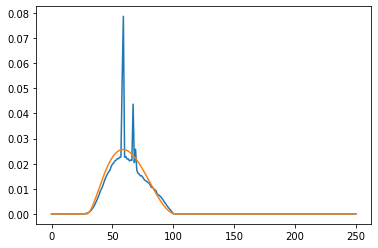

In [93]:
plt.plot(realspec)
plt.plot(inpspec)

In [107]:
diffs[0].shape

(251,)

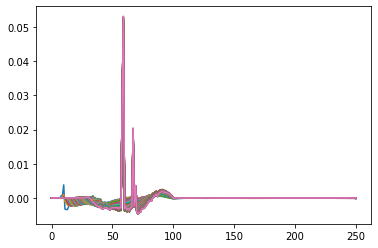

In [106]:
for i in range(2,109):
    #plt.plot(wholeinp[i])
    plt.plot(diffs[i])

In [152]:
class NeuralFixer(torch.nn.Module):
    def __init__(self, in_channels=1):
        super(NeuralFixer, self).__init__()
        self.conv1 = torch.nn.Conv1d(in_channels, 32, kernel_size=3, padding=1)
        self.conv2 = torch.nn.Conv1d(32, 32, kernel_size=3, padding=1)
        # Layer 2
        self.conv3 = torch.nn.Conv1d(32, 251, kernel_size=251, padding=0,bias=True)
        self.relu =torch.nn.functional.relu
        self.tanh=torch.nn.functional.tanh
    def forward(self, z):
        B,C,W=z.shape
        #x = self.relu(self.adapt_nn(z)).cuda()
        #x = x.view(x.size(0), self.in_channels, self.length // 2 // 2 // 2)
        x = self.relu(self.conv1(z))
        x = self.relu(self.conv2(x))
        x = self.tanh(self.conv3(x))
        out =x.reshape(B,-1)
        return out

In [176]:
def trainstep2(model,inp,target, optimizer,lossfn=torch.nn.L1Loss()):
    optimizer.zero_grad()
    out=model(inp)
    loss=lossfn(out, target)*100
    loss.backward()
    optimizer.step()    
    return loss

In [186]:
fixer=NeuralFixer().cuda()
inps=torch.stack([torch.tensor(inp).float() for inp in wholeinp[1:]],0).unsqueeze(1).cuda()
targets=torch.stack([torch.tensor(diff).float() for diff in diffs[1:]],0).cuda()
optimizer=torch.optim.Adam(fixer.parameters(),lr=0.001)
for i in range(1000):
    loss=trainstep2(fixer,inps,targets, optimizer)
    print(loss)

tensor(4.6133, device='cuda:0', grad_fn=<MulBackward0>)
tensor(34.4975, device='cuda:0', grad_fn=<MulBackward0>)
tensor(33.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(20.9396, device='cuda:0', grad_fn=<MulBackward0>)
tensor(5.7350, device='cuda:0', grad_fn=<MulBackward0>)
tensor(9.5670, device='cuda:0', grad_fn=<MulBackward0>)
tensor(14.5821, device='cuda:0', grad_fn=<MulBackward0>)
tensor(14.2956, device='cuda:0', grad_fn=<MulBackward0>)
tensor(11.7055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(8.1647, device='cuda:0', grad_fn=<MulBackward0>)
tensor(4.2983, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.7142, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.1987, device='cuda:0', grad_fn=<MulBackward0>)
tensor(3.0000, device='cuda:0', grad_fn=<MulBackward0>)
tensor(3.1196, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.7151, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.9809, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.3313, device='cuda:0', grad_fn=<M

tensor(0.0306, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0301, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0304, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0314, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0314, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0303, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0296, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0303, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0310, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0311, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0306, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0302, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0305, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0304, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0306, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0304, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0298, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0307, device='cuda:0', grad_fn=<MulBack

tensor(0.0306, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0302, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0302, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0305, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0307, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0304, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0311, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0313, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0310, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0305, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0309, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0319, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0312, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0304, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0307, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0315, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0311, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0310, device='cuda:0', grad_fn=<MulBack

tensor(0.0303, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0314, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0313, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0306, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0307, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0308, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0311, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0312, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0313, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0309, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0312, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0313, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0314, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0311, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0312, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0307, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0311, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0307, device='cuda:0', grad_fn=<MulBack

tensor(0.0298, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0301, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0294, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0293, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0299, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0299, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0308, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0308, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0302, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0299, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0310, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0313, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0311, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0303, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0302, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0302, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0308, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0306, device='cuda:0', grad_fn=<MulBack

tensor(0.0303, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0304, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0304, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0294, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0297, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0299, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0304, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0297, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0289, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0296, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0302, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0301, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0302, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0302, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0303, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0301, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0304, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0301, device='cuda:0', grad_fn=<MulBack

tensor(0.0295, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0297, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0304, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0305, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0298, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0295, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0302, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0306, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0305, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0296, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0301, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0308, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0306, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0303, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0301, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0303, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0304, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0299, device='cuda:0', grad_fn=<MulBack

In [213]:
torch.onnx.export(fixer, inps[:1,...], "fixer.onnx", verbose=True, input_names=['restored spectra'], output_names=['refined difference'])

In [191]:
inps.shape

torch.Size([108, 1, 251])

In [193]:
Ans=fixer(inps)
corrected=Ans+inps.squeeze(1)

In [205]:
inps.shape

torch.Size([108, 1, 251])

Text(0, 0.5, 'Интенсивность, отн.ед.')

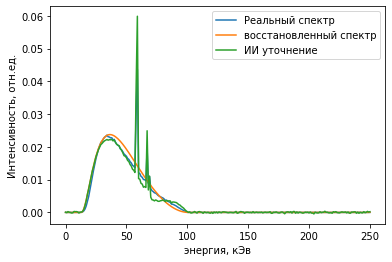

In [210]:
for i in [9]:
    plt.plot(realspecs[i+1],label='Реальный спектр')
    plt.plot(inps[i][0].cpu().numpy(),label='восстановленный спектр')
    plt.plot(corrected[i].cpu().detach().numpy(),label='ИИ уточнение')
plt.legend()
plt.xlabel('энергия, кЭв')
plt.ylabel('Интенсивность, отн.ед.')

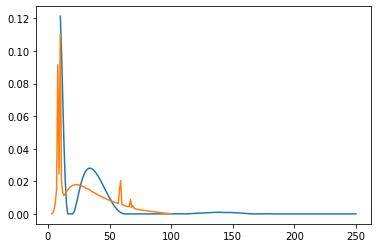

In [70]:
number=k
plt.plot(np.array(range(10,251)),outs[number]/outs[number].sum())
plt.plot(specs[number]['energy'],specs[number]['I']/sum(specs[number]['I']),label='СПЕКТР')

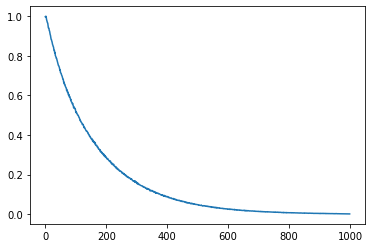

In [22]:
plt.plot(target[0,0,:].numpy())

In [187]:
adamsimple=np.log10(lossesADAM)

In [189]:
#lossRMSPROP=np.array(losses)
%matplotlib qt
plt.figure(figsize=(10,5))
plt.plot(adamanneal,label='Adam + отжиг')
plt.plot(adamsimple,label='Adam')
#plt.plot(np.log10(lossesSGD),label='Метод моментов')
#plt.plot(np.log10(lossesRMS),label='Градиентный спуск')
plt.legend()
plt.xlabel('Число итераций, x100')
plt.ylabel('Log10 (L)')

Text(0, 0.5, 'Log10 (L)')

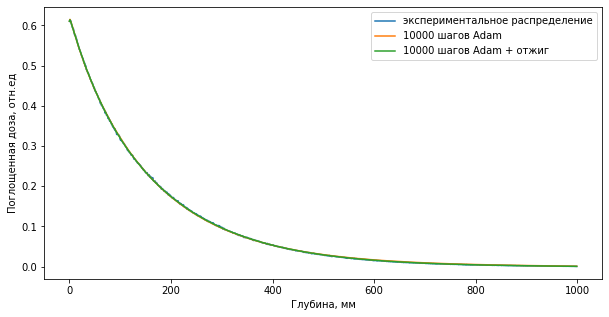

In [170]:
%matplotlib inline
plt.figure(figsize=(10,5))
#AnsADAM=modelADAM(inps)
#AnsRMS=modelRMS(inps)
#AnsSGD=modelSGD(inps)
AnsADAManneal=modelADAM(inps)
#AnsADAM
plt.plot(target[0][0].detach().numpy(), label='экспериментальное распределение')
#plt.plot(AnsRMS[0][0].detach().numpy(), label='10000 шагов метод импульса')
#plt.plot(AnsSGD[0][0].detach().numpy(), label='10000 шагов МНК')
plt.plot(AnsADAM[0][0].detach().numpy(), label='10000 шагов Adam')
plt.plot(AnsADAManneal[0][0].detach().numpy(), label='10000 шагов Adam + отжиг')
plt.xlabel('Глубина, мм')
plt.ylabel('Поглощенная доза, отн.ед')
plt.legend()

In [116]:
modelSGD.spectrum.weight[0,:,0].sum()

tensor(0., grad_fn=<SumBackward0>)

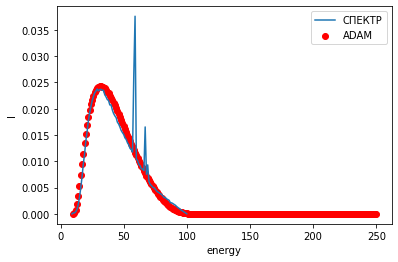

In [194]:
%matplotlib inline

plt.plot(specs[number]['energy'],specs[number]['I']/sum(specs[number]['I']),label='СПЕКТР')
#plt.scatter(np.array(range(10,251)),modelSGD.spectrum.weight[0,:,0].detach().numpy()/model.spectrum.weight[0,:,0].detach().numpy().sum(),label='SGD')
#plt.scatter(np.array(range(10,251)),modelRMS.spectrum.weight[0,:,0].detach().numpy()/model.spectrum.weight[0,:,0].detach().numpy().sum(),label='RMS')
plt.scatter(np.array(range(10,251)),modelADAM.spectrum.weight[0,:,0].detach().numpy()/model.spectrum.weight[0,:,0].detach().numpy().sum(),label='ADAM',c='r')

plt.xlabel('energy')
plt.ylabel('I')
plt.legend()

In [21]:
model.spectrum.weight.max()

tensor(0.0072, grad_fn=<MaxBackward1>)

In [22]:
#plt.plot(model.spectrum.weight[0,:,0].abs().detach().numpy()*2000)
#plt.plot(specs[1]['I'])
#plt.plot(model.spectrum.weight[0,:,0].abs().detach().numpy()*specs[2]['I'])
T=specs[10]['I']
O=model.spectrum.weight[0,:,0].abs().detach().numpy()

In [29]:
#np.random.rand(250)

In [30]:
np.correlate(np.random.rand(250),np.random.rand(250))

array([64.49520943])

In [24]:
class Basic_convnet(torch.nn.Module):
    def __init__(self, num_filters=16, channels_in=1, channels_out=241):
        super().__init__()
        self.channels_in=channels_in
        conv_layer = torch.nn.Conv1d
        norm_layer = torch.nn.BatchNorm1d
        self.conv1 = conv_layer(channels_in, num_filters, 10, 2,padding='valid')
        self.conv2 = conv_layer(num_filters, num_filters, 10, 4,padding='valid')
        self.conv3 = conv_layer(num_filters, num_filters, 10, 4,padding='valid')
        self.conv4 = conv_layer(num_filters, num_filters, 10, 4,padding='valid')
        self.batch_norm = norm_layer(num_filters)
        self.leaky_relu = torch.nn.LeakyReLU(0.2)
        self.flatter=torch.nn.Flatten()
        self.relu = torch.nn.ReLU()
        self.softmax = torch.nn.Softmax()
        self.regressor=torch.nn.Linear(192,16)
        self.regressor2=torch.nn.Linear(16,channels_out)
        #self.sigmoid = torch.nn.Sigmoid()
    def forward(self, inputs):
        x1=self.leaky_relu(self.conv1(inputs))
        x2=self.leaky_relu(self.conv2(x1))
        x3=self.leaky_relu(self.conv3(x2))
        x4=self.leaky_relu(self.conv4(x3))
        x5=torch.nn.MaxPool1d(5)(x4)
        outs=self.regressor(self.flatter(x5))
        #outs=self.softmax(self.regressor2(outs))
        outs=outs/outs.sum()
        return outs

In [25]:
def trainstep(model,inp,target, optimizer,lossfn=torch.nn.MSELoss()):
    optimizer.zero_grad()
    out=model(inp)
    loss=lossfn(out, target)*10000
    loss.backward()
    optimizer.step()    
    return loss

In [26]:
inps=[]
targets=[]
for i in range(1,70):
    inps.append(torch.tensor(dosedistrs[i]['E']/dosedistrs[i]['E'].sum()))
    targets.append(torch.tensor(specs[i]['I']/specs[i]['I'].sum()))
inptrain=torch.stack(inps).unsqueeze(1).to(torch.float32)
targettrain=torch.stack(targets).to(torch.float32)
inps=[]
targets=[]
for i in range(70,93):
    inps.append(torch.tensor(dosedistrs[i]['E']/dosedistrs[i]['E'].sum()))
    targets.append(torch.tensor(specs[i]['I']/specs[i]['I'].sum()))
inptest=torch.stack(inps).unsqueeze(1).to(torch.float32)
targettest=torch.stack(targets).to(torch.float32)

KeyError: 1

In [34]:
model=Basic_convnet()
model.train()
optimizer=torch.optim.Adam(model.parameters(), lr=0.0001)
for steps in range(100):
    loss=trainstep(model,inptrain,targettrain, optimizer,lossfn=torch.nn.L1Loss())
    #print(model.conv4.weight[0][0])
    if steps%10==0:
        with torch.no_grad():
            Ans=model(inptest)
            print((Ans-targettest).abs().mean()*10000)
            print(loss)

NameError: name 'inptrain' is not defined

In [ ]:
Ans=model(inptrain)

In [ ]:
model.parameters

In [ ]:
plt.plot(Ans.detach()[10])
plt.plot(targettrain.detach()[10])

In [ ]:
num_params = sum(param.numel() for param in model.parameters())

In [ ]:
num_params

In [ ]:
A=[param.numel() for param in model.parameters()]

In [ ]:
A